# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import the OpenWeatherMap API key
from api_keys_copy1 import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bathsheba
Processing Record 2 of Set 1 | mvurwi
Processing Record 3 of Set 1 | oroqen zizhiqi
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | nabire
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | el granada
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | akureyri
Processing Record 13 of Set 1 | pacific grove
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | holualoa
Processing Record 16 of Set 1 | touros
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | embi
Processing Record 19 of Set 1 | luganville
Processing Record 20 of Set 1 | crane
Processing Record 21 of Set 1 | luumaki
Processing Record 22 of Set 1 | waitangi
Process

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bathsheba,13.2167,-59.5167,83.01,74,20,17.27,BB,1712878124
1,mvurwi,-17.0333,30.8500,59.34,97,100,7.18,ZW,1712878124
2,oroqen zizhiqi,50.5667,123.7167,39.87,88,100,2.37,CN,1712878124
3,puerto natales,-51.7236,-72.4875,37.94,91,36,5.46,CL,1712878124
4,nabire,-3.3667,135.4833,75.36,96,100,2.01,ID,1712878124


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bathsheba,13.2167,-59.5167,83.01,74,20,17.27,BB,1712878124
1,mvurwi,-17.0333,30.8500,59.34,97,100,7.18,ZW,1712878124
2,oroqen zizhiqi,50.5667,123.7167,39.87,88,100,2.37,CN,1712878124
3,puerto natales,-51.7236,-72.4875,37.94,91,36,5.46,CL,1712878124
4,nabire,-3.3667,135.4833,75.36,96,100,2.01,ID,1712878124
...,...,...,...,...,...,...,...,...,...
582,bekobod,40.2208,69.2697,64.09,71,100,8.39,UZ,1712878210
583,lensk,60.7253,114.9278,5.04,89,98,2.89,RU,1712878210
584,alta,69.9689,23.2717,34.86,83,100,48.99,NO,1712878210


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

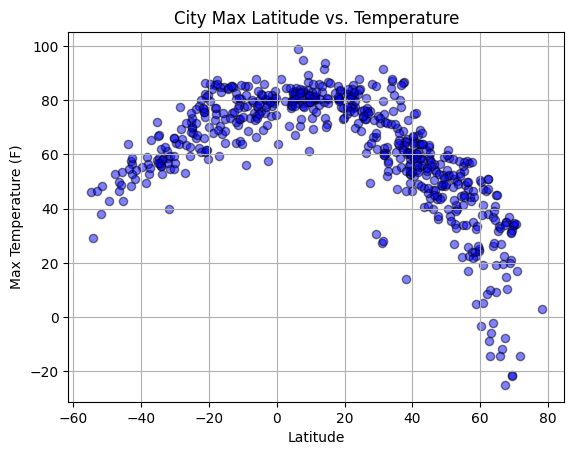

In [28]:
# Build scatter plot for latitude vs. temperature
x_lat = city_data_df["Lat"]
y_temp = city_data_df["Max Temp"]

#scatter plot
plt.scatter(x_lat, y_temp, s=35, c='blue', marker='o', alpha = 0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

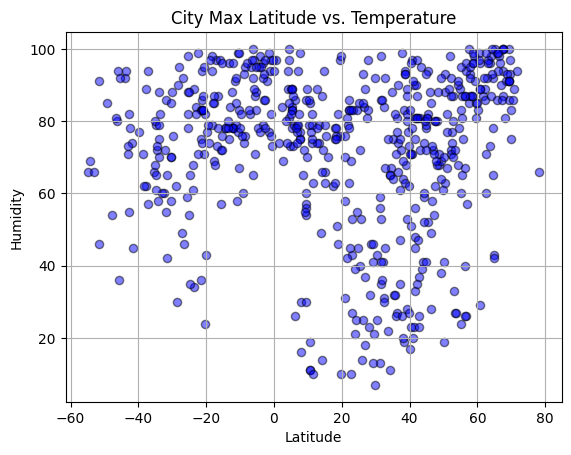

In [29]:
# Build the scatter plots for latitude vs. humidity
x_lat = city_data_df["Lat"]
y_hum = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_lat, y_hum, s=35, c='blue', marker='o', alpha = 0.5, edgecolors='black')

plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

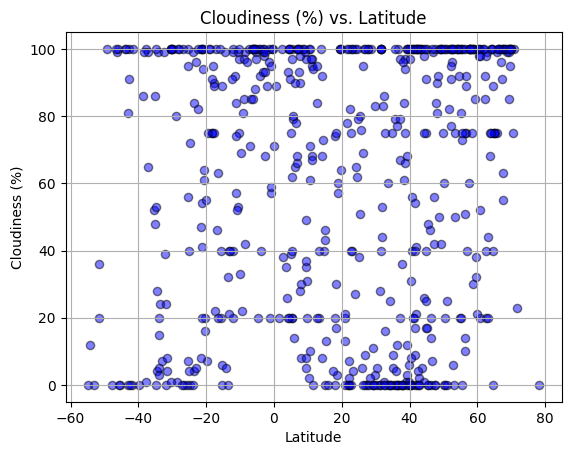

In [30]:
# Build the scatter plots for latitude vs. cloudiness
x_lat = city_data_df["Lat"]
y_clouds = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x_lat, y_clouds, s=35, c='blue', marker='o', alpha = 0.5, edgecolors='black')

plt.title('Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

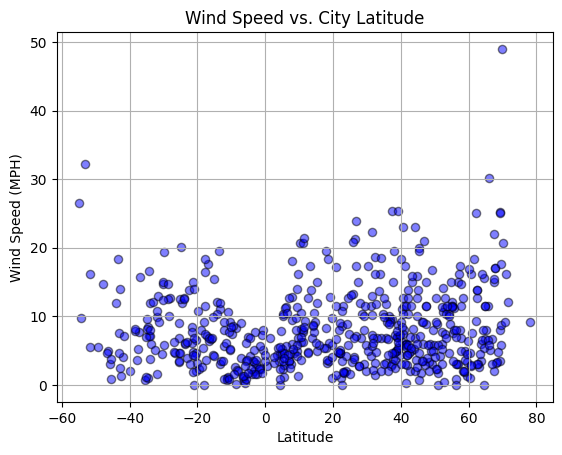

In [31]:
# Build the scatter plots for latitude vs. wind speed
x_lat = city_data_df["Lat"]
y_wind = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_lat, y_wind, s=35, c='blue', marker='o', alpha = 0.5, edgecolors='black')

plt.title('Wind Speed vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def regression_finder(x,y,x_label,y_label,title):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress_values = x * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x,y, s=35, c='blue', marker='o', alpha = 0.5, edgecolors='black')
    plt.plot(x,regress_values,"r-")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(5,8),fontsize=10,color="red")
    plt.show()
    print(f"The r-value is {rvalue}")

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bathsheba,13.2167,-59.5167,83.01,74,20,17.27,BB,1712878124
2,oroqen zizhiqi,50.5667,123.7167,39.87,88,100,2.37,CN,1712878124
7,albany,42.6001,-73.9662,58.68,81,100,1.99,US,1712878125
8,el granada,37.5027,-122.4694,86.58,72,0,25.32,US,1712878125
10,cabo san lucas,22.8909,-109.9124,81.61,43,40,11.50,MX,1712878108


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mvurwi,-17.0333,30.8500,59.34,97,100,7.18,ZW,1712878124
3,puerto natales,-51.7236,-72.4875,37.94,91,36,5.46,CL,1712878124
4,nabire,-3.3667,135.4833,75.36,96,100,2.01,ID,1712878124
5,port-aux-francais,-49.3500,70.2167,42.80,85,100,5.50,TF,1712878124
6,bredasdorp,-34.5322,20.0403,56.34,72,4,8.48,ZA,1712878124


###  Temperature vs. Latitude Linear Regression Plot

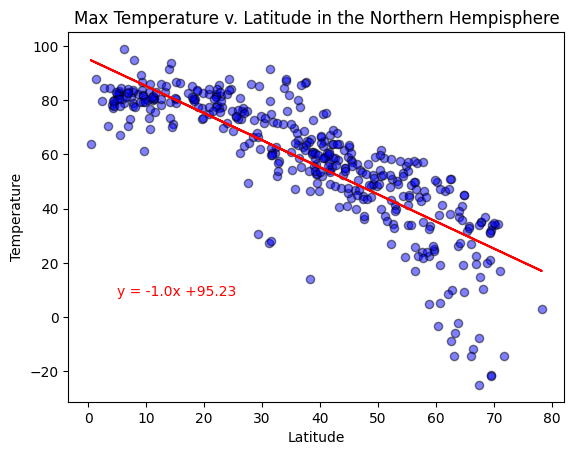

The r-value is -0.83096006118871


In [20]:
#finding the data
n_temp = northern_hemi_df["Max Temp"]
n_lat = northern_hemi_df["Lat"]

#running the function
regression_finder(n_lat, n_temp,"Latitude","Temperature","Max Temperature v. Latitude in the Northern Hempisphere")

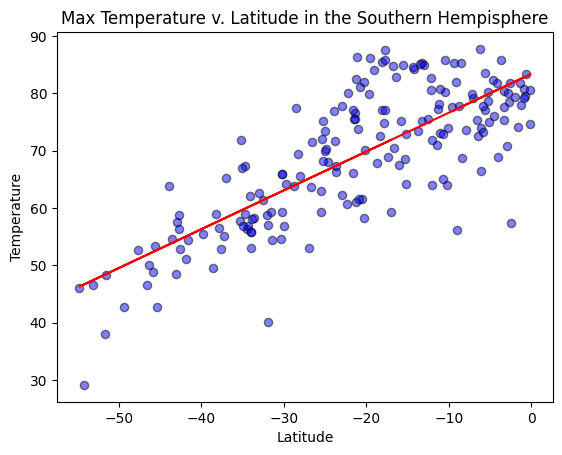

The r-value is 0.7852640515474377


In [21]:
# Linear regression on Southern Hemisphere
s_temp = southern_hemi_df["Max Temp"]
s_lat = southern_hemi_df["Lat"]

#running the function
regression_finder(s_lat, s_temp,"Latitude","Temperature","Max Temperature v. Latitude in the Southern Hempisphere")

**Discussion about the linear relationship:** We see a strong negative relationship between temperature and latititude in the northern hemisphere and a strong positive relationship between in the southern hemisphere. This means that the closer the latitude gets to zero, the hotter the observed temperature and the further away from the equator you go, the colder the observed temperature is.

### Humidity vs. Latitude Linear Regression Plot

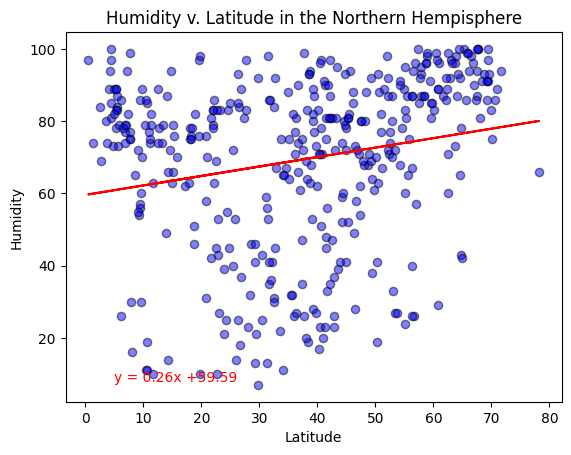

The r-value is 0.21111086238067586


In [22]:
# Northern Hemisphere
n_hum = northern_hemi_df["Humidity"]

#running the function
regression_finder(n_lat, n_hum,"Latitude","Humidity","Humidity v. Latitude in the Northern Hempisphere")

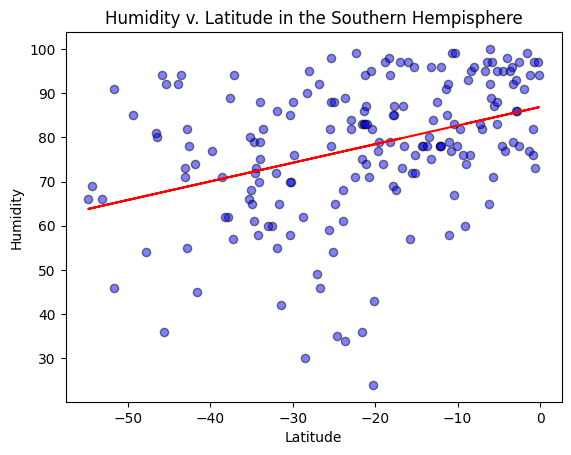

The r-value is 0.3732622461759949


In [23]:
# Southern Hemisphere
s_hum = southern_hemi_df["Humidity"]

#running the function
regression_finder(s_lat, s_hum,"Latitude","Humidity","Humidity v. Latitude in the Southern Hempisphere")

**Discussion about the linear relationship:** In both cases, the data presents weak positive relationships between humidity and latitude. From this data, it can be asserted that latititude does not have a material affect on humidity. Humidity is likely determined by other factors.

### Cloudiness vs. Latitude Linear Regression Plot

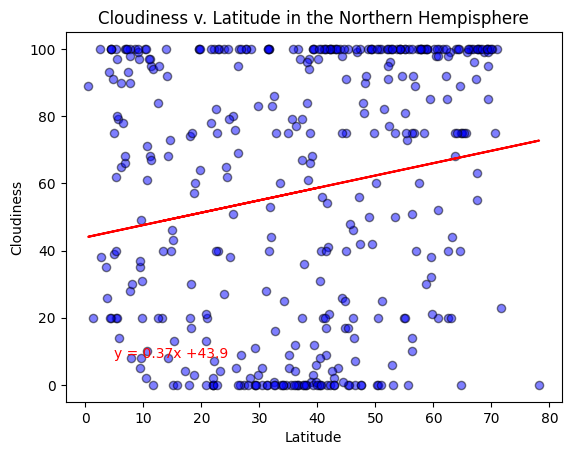

The r-value is 0.18043755927027394


In [24]:
# Northern Hemisphere
n_cloud = northern_hemi_df["Cloudiness"]

#running the function
regression_finder(n_lat, n_cloud,"Latitude","Cloudiness","Cloudiness v. Latitude in the Northern Hempisphere")

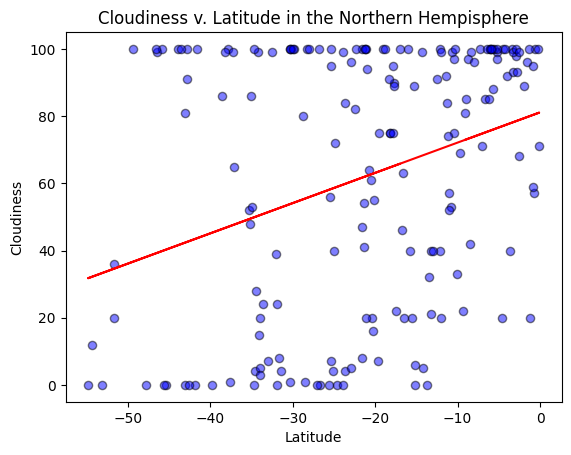

The r-value is 0.3220746530413979


In [25]:
# Southern Hemisphere
s_cloud = southern_hemi_df["Cloudiness"]

#running the function
regression_finder(s_lat, s_cloud,"Latitude","Cloudiness","Cloudiness v. Latitude in the Northern Hempisphere")

**Discussion about the linear relationship:** Similar to what is observed with wind, there are weak positive relationships between latitutde and cloudiness for both the northern and souther hemispheres. This hints that latititude doesn't have a strong impact on determining the cloudiness of an area.

### Wind Speed vs. Latitude Linear Regression Plot

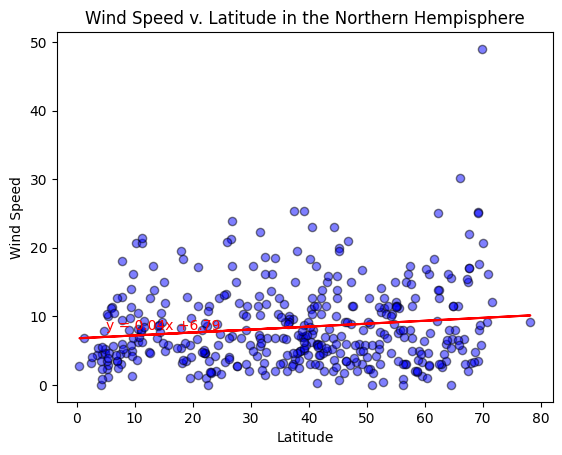

The r-value is 0.13992298808323017


In [26]:
# Northern Hemisphere
n_wind = northern_hemi_df["Wind Speed"]

#running the function
regression_finder(n_lat, n_wind,"Latitude","Wind Speed","Wind Speed v. Latitude in the Northern Hempisphere")

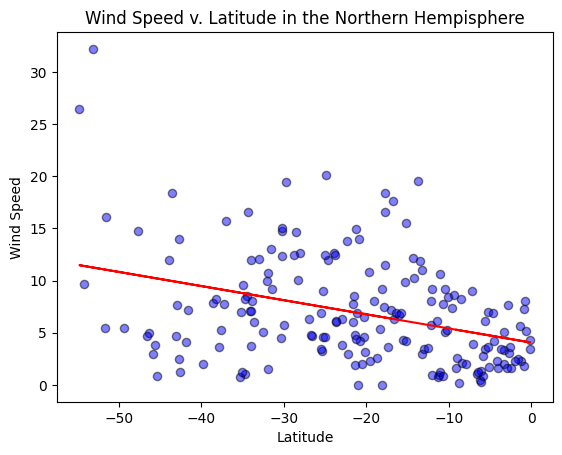

The r-value is -0.36049088462264745


In [27]:
# Southern Hemisphere
s_wind = southern_hemi_df["Wind Speed"]

#running the function
regression_finder(s_lat, s_wind,"Latitude","Wind Speed","Wind Speed v. Latitude in the Northern Hempisphere")

**Discussion about the linear relationship:** For this data set, there is an interesting relationship between wind speed and latititude. There is a weak, but still positive relationship between wind and latititude in the northern hemisphere and a still weak, albeit slightlier stronger, negative relationship in the southern hemisphere. The differences imply that there is some correlation between latititude and wind speed with faster wind temperatures observed further from the equator.